permute_cluster_label

pandasといえばpandasの内容だし、scikit-learnといえばscikit-learnの内容だし、どっちに分類するか悩ましいな。  
クラスタリングの見栄えを調整する話なので、scikit-learnに分類しておこう。

In [1]:
import pandas as pd
import seaborn as sns
pd.options.display.notebook_repr_html = False  # jupyter notebook上での出力形式を制御するために書いています。無くても動きます。

import sklearn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
# 動作環境の確認
print(pd.__version__)
print(sns.__version__)
print(sklearn.__version__)

1.1.2
0.11.0
0.24.1


In [3]:
sns.set_style('whitegrid') # seaborn見た目の変更。グラフ内にグリッド線を表示する

In [4]:
random_state = 123

In [5]:
# 例示用にクラスタリングするデータを作成する
center_coordinates = [[0, 0], [1, 2], [3, 1], [2, 3], [4, 4]] 
n_clusters = len(center_coordinates)
X, y = make_blobs(n_samples=30*n_clusters, centers=center_coordinates, n_features=2, cluster_std=0.3, random_state=random_state)

In [6]:
df = pd.DataFrame(data=X, columns=['x1', 'x2'])

In [7]:
# sns.scatterplot(x=0, y=1, data=X)
# なんか見慣れないエラーが出てくる。ダメ。

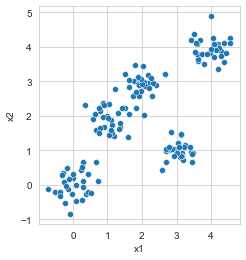

In [8]:
ax = sns.scatterplot(x='x1', y='x2', data=df)
ax.set_aspect('equal') # グラフの縦横比を同じにする 参考：https://xnn.sakura.ne.jp/blog/2019/07/match-the-scatterplot-grid-width-in-matplotlib/

In [9]:
y_pred = KMeans(n_clusters=n_clusters, random_state=random_state).fit_predict(df)

In [10]:
df['y_pred'] =  y_pred

In [11]:
df.head()

         x1        x2  y_pred
0  4.190783  4.085381       0
1  1.917537  2.575175       2
2  1.771612  3.001094       2
3  0.992612  2.010243       1
4  1.925955  3.020636       2

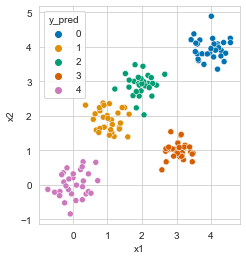

In [12]:
ax = sns.scatterplot(x='x1', y='x2', hue='y_pred', data=df, palette='colorblind')
ax.set_aspect('equal')

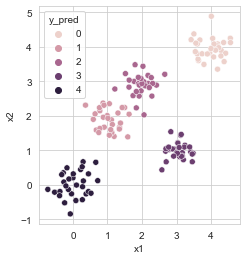

In [13]:
ax = sns.scatterplot(x='x1', y='x2', hue='y_pred', data=df)
ax.set_aspect('equal')
# paletteを指定しないと色の変化が連続的になるので説明に合致するかもね
# ところでこのデフォルトのpaletteはどこで決まってるの？

ところでこのデフォルトのpaletteはどこで決まってるの？

https://seaborn.pydata.org/generated/seaborn.scatterplot.html  
**hue** vector or key in data  
Grouping variable that will produce points with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case.  
これ、y_predがcategoricalではなくてnumericな値だから連続的なカラーマップが使われているんだな。

https://seaborn.pydata.org/tutorial/color_palettes.html  
Calling color_palette() with no arguments will return the current default color palette that matplotlib (and most seaborn functions) will use if colors are not otherwise specified.   
……デフォルトの現在のカラーパレットが表示される。けどこれはカテゴリカル用のカラーマップじゃん（下記）。うーーん……

In [14]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

## クラスタリングのラベルを、ある変数の値の順序に従って並び替えるにはどうすればよいか？
上の図の通り、クラスタリングアルゴリズムがラベルを振る順番はバラバラである。

In [15]:
df.groupby('y_pred')['x1'].mean().sort_values().index

Int64Index([4, 1, 2, 3, 0], dtype='int64', name='y_pred')

In [16]:
range(n_clusters)

range(0, 5)

In [17]:
df['y_pred_sorted'] =  df['y_pred'].replace(
    df.groupby('y_pred')['x1'].mean().sort_values().index,
    range(n_clusters)
)

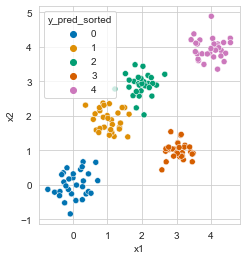

In [18]:
ax = sns.scatterplot(x='x1', y='x2', hue='y_pred_sorted', data=df, palette='colorblind')
ax.set_aspect('equal')

## ところで。 正解率の判定にももしかしたらこのやり方は使えるかもしれない。

In [19]:
sklearn.metrics.accuracy_score(y, y_pred)

0.19333333333333333

In [20]:
sklearn.metrics.confusion_matrix(y, y_pred)

array([[ 0,  0,  0,  0, 30],
       [ 0, 29,  1,  0,  0],
       [ 0,  0,  0, 30,  0],
       [ 0,  0, 30,  0,  0],
       [30,  0,  0,  0,  0]])